In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import pickle as pkl

In [2]:
with open('solution_Nsub16_Niter2000.pkl', 'rb') as f:
    solution = pkl.load(f)

In [3]:
result = solution['result']
true_maps = solution['true_maps']
seenpix = solution['seenpix']
center_gal = solution['center_gal']
center_local = solution['center_local']
min_input = solution['min_input']
max_input = solution['max_input']

seenpix_gal = seenpix[0]
seenpix_local = seenpix[1]

Text(0, 0.5, 'Convergence')

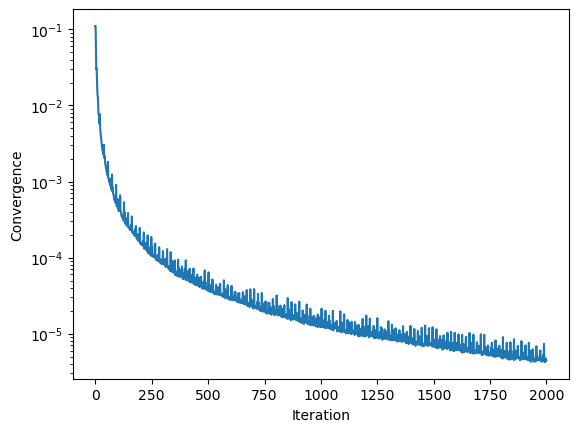

In [4]:
plt.plot(result["convergence"])
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Convergence")

In [5]:
input = true_maps.copy()
output = result['x'].copy()
residual = input - output

/tmp/ipykernel_152225/3972253953.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


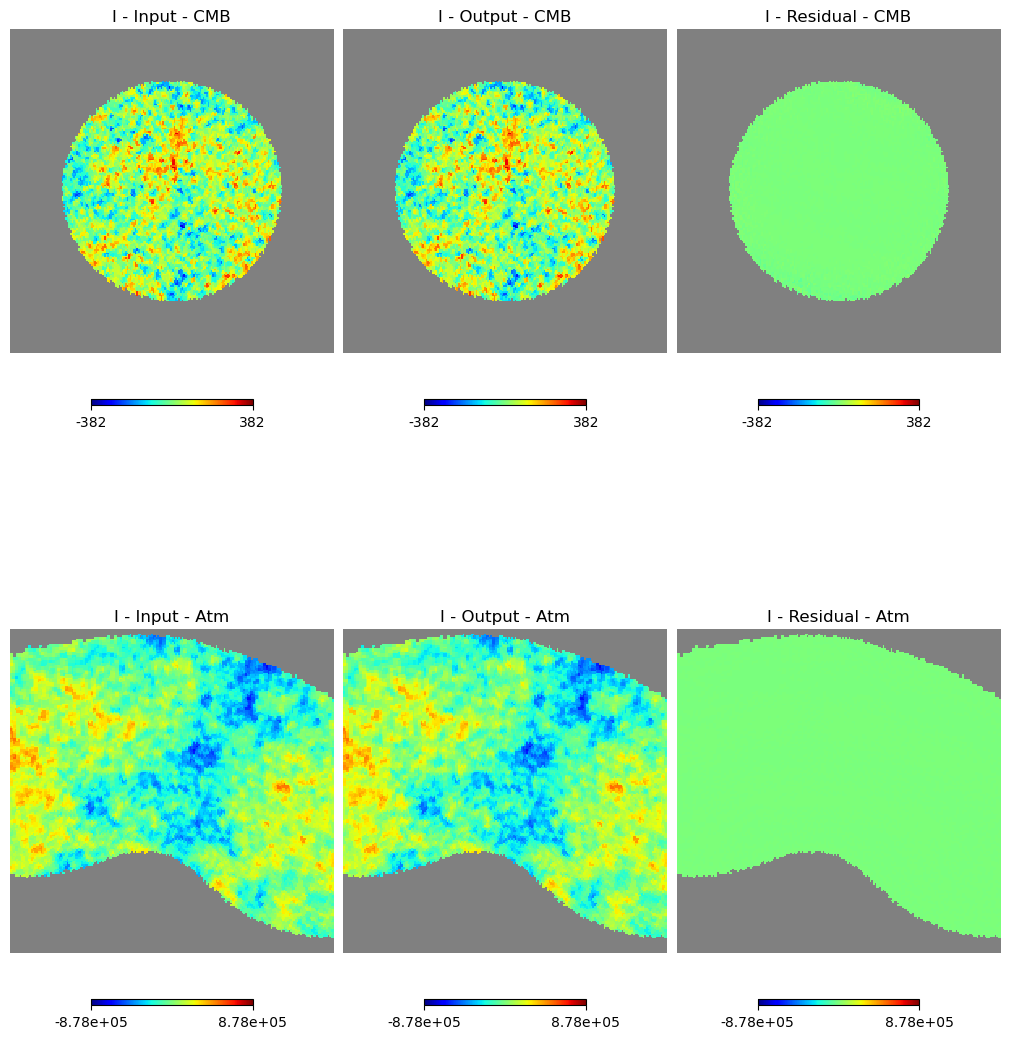

In [6]:
plt.figure(figsize=(10, 12))
k = 1

istk = 0
stk = ["I", "Q", "U"]

reso = 20

for imap in range(input.shape[0]):
    if imap == 0:
        map = "CMB"
        center = center_gal
        input[imap, ~seenpix_gal, :] = hp.UNSEEN
        output[imap, ~seenpix_gal, :] = hp.UNSEEN
        residual[imap, ~seenpix_gal, :] = hp.UNSEEN
    else:
        map = "Atm"
        center = center_local
        input[imap, ~seenpix_local, :] = hp.UNSEEN
        output[imap, ~seenpix_local, :] = hp.UNSEEN
        residual[imap, ~seenpix_local, :] = hp.UNSEEN

    hp.gnomview(
        input[imap, :, istk],
        reso=reso,
        rot=center,
        min=min_input[imap, istk],
        max=max_input[imap, istk],
        cmap="jet",
        sub=(input.shape[0], 3, k),
        title=f"{stk[istk]} - Input - {map}",
        notext=True,
    )
    hp.gnomview(
        output[imap, :, istk],
        reso=reso,
        rot=center,
        min=min_input[imap, istk],
        max=max_input[imap, istk],
        cmap="jet",
        sub=(input.shape[0], 3, k + 1),
        title=f"{stk[istk]} - Output - {map}",
        notext=True,
    )
    hp.gnomview(
        residual[imap, :, istk],
        reso=reso,
        rot=center,
        min=min_input[imap, istk],
        max=max_input[imap, istk],
        cmap="jet",
        sub=(input.shape[0], 3, k + 2),
        title=f"{stk[istk]} - Residual - {map}",
        notext=True,
    )
    k += 3

plt.tight_layout()

/tmp/ipykernel_152225/1169109782.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


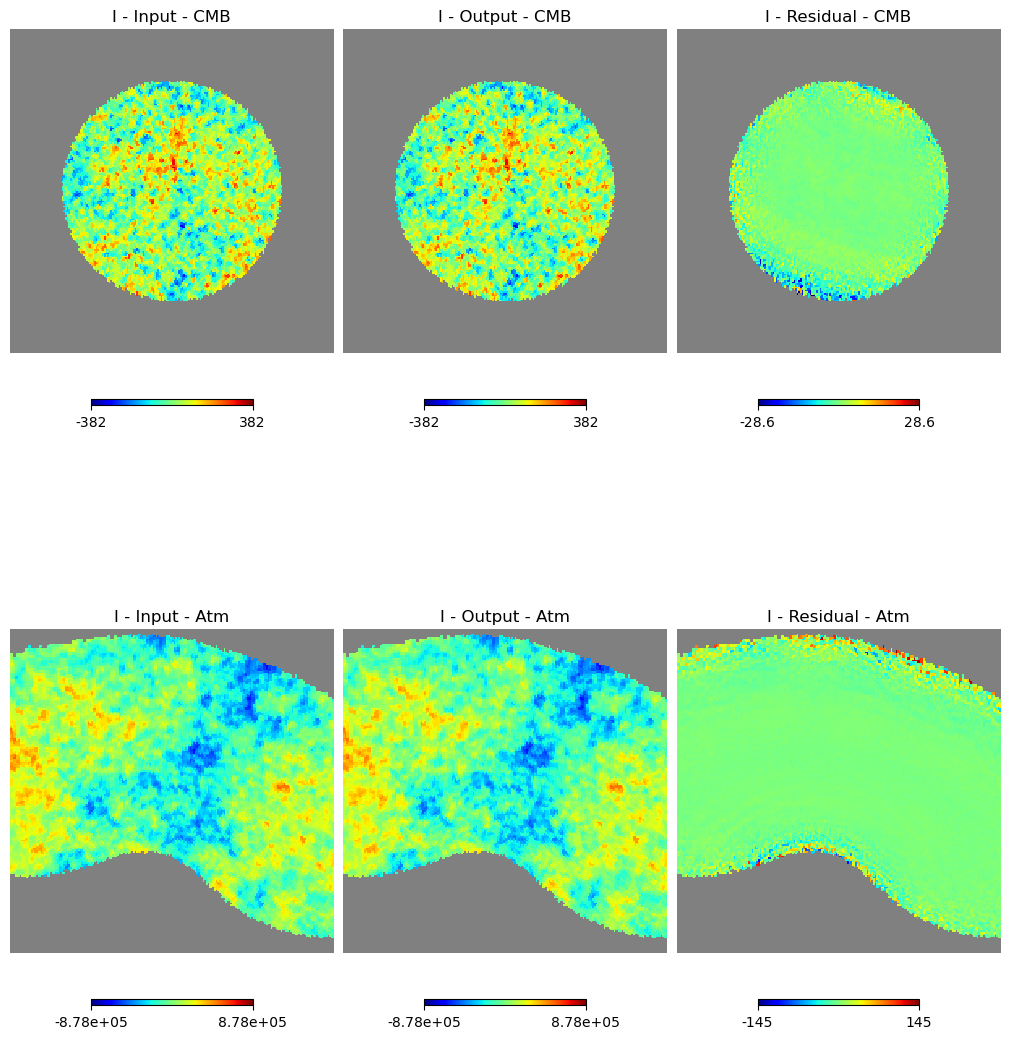

In [7]:
plt.figure(figsize=(10, 12))
k = 1

istk = 0
stk = ["I", "Q", "U"]

reso = 20

for imap in range(input.shape[0]):
    if imap == 0:
        map = "CMB"
        center = center_gal
        input[imap, ~seenpix_gal, :] = hp.UNSEEN
        output[imap, ~seenpix_gal, :] = hp.UNSEEN
        residual[imap, ~seenpix_gal, :] = hp.UNSEEN
    else:
        map = "Atm"
        center = center_local
        input[imap, ~seenpix_local, :] = hp.UNSEEN
        output[imap, ~seenpix_local, :] = hp.UNSEEN
        residual[imap, ~seenpix_local, :] = hp.UNSEEN

    min_res = np.min(residual[imap, seenpix[imap], istk])
    max_res = np.max(residual[imap, seenpix[imap], istk])
    range_hp = np.max([-min_res, max_res])

    hp.gnomview(
        input[imap, :, istk],
        reso=reso,
        rot=center,
        min=min_input[imap, istk],
        max=max_input[imap, istk],
        cmap="jet",
        sub=(input.shape[0], 3, k),
        title=f"{stk[istk]} - Input - {map}",
        notext=True,
    )
    hp.gnomview(
        output[imap, :, istk],
        reso=reso,
        rot=center,
        min=min_input[imap, istk],
        max=max_input[imap, istk],
        cmap="jet",
        sub=(input.shape[0], 3, k + 1),
        title=f"{stk[istk]} - Output - {map}",
        notext=True,
    )
    hp.gnomview(
        residual[imap, :, istk],
        reso=reso,
        rot=center,
        min=-range_hp,
        max=range_hp,
        cmap="jet",
        sub=(input.shape[0], 3, k + 2),
        title=f"{stk[istk]} - Residual - {map}",
        notext=True,
    )
    k += 3

plt.tight_layout()

/tmp/ipykernel_152225/1269438830.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


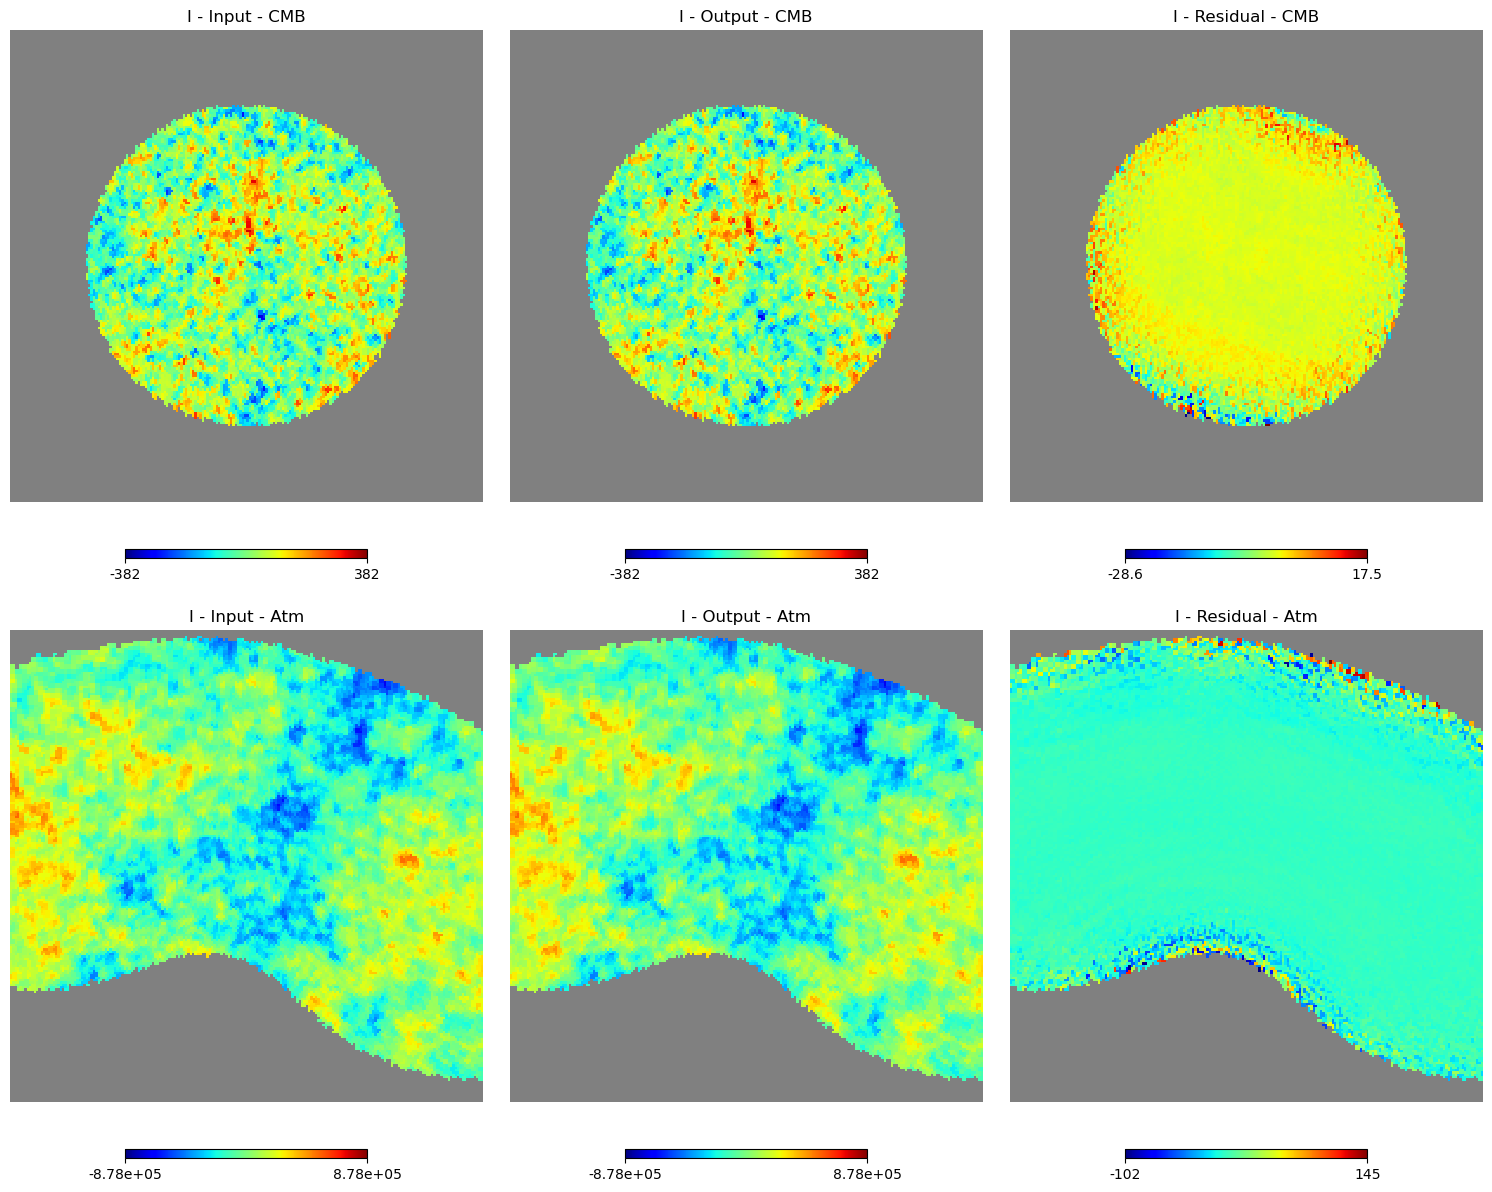

In [8]:
plt.figure(figsize=(15, 12))
k = 1

istk = 0
stk = ["I", "Q", "U"]

reso = 20

for imap in range(input.shape[0]):
    if imap == 0:
        map = "CMB"
        center = center_gal
        input[imap, ~seenpix_gal, :] = hp.UNSEEN
        output[imap, ~seenpix_gal, :] = hp.UNSEEN
        residual[imap, ~seenpix_gal, :] = hp.UNSEEN
    else:
        map = "Atm"
        center = center_local
        input[imap, ~seenpix_local, :] = hp.UNSEEN
        output[imap, ~seenpix_local, :] = hp.UNSEEN
        residual[imap, ~seenpix_local, :] = hp.UNSEEN

    min_res = np.min(residual[imap, seenpix[imap], istk])
    max_res = np.max(residual[imap, seenpix[imap], istk])
    range_hp = np.max([-min_res, max_res])

    hp.gnomview(
        input[imap, :, istk],
        reso=reso,
        rot=center,
        min=min_input[imap, istk],
        max=max_input[imap, istk],
        cmap="jet",
        sub=(input.shape[0], 3, k),
        title=f"{stk[istk]} - Input - {map}",
        notext=True,
    )
    hp.gnomview(
        output[imap, :, istk],
        reso=reso,
        rot=center,
        min=min_input[imap, istk],
        max=max_input[imap, istk],
        cmap="jet",
        sub=(input.shape[0], 3, k + 1),
        title=f"{stk[istk]} - Output - {map}",
        notext=True,
    )
    hp.gnomview(
        residual[imap, :, istk],
        reso=reso,
        rot=center,
        cmap="jet",
        sub=(input.shape[0], 3, k + 2),
        title=f"{stk[istk]} - Residual - {map}",
        notext=True,
    )
    k += 3

plt.tight_layout()

/tmp/ipykernel_152225/907862759.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


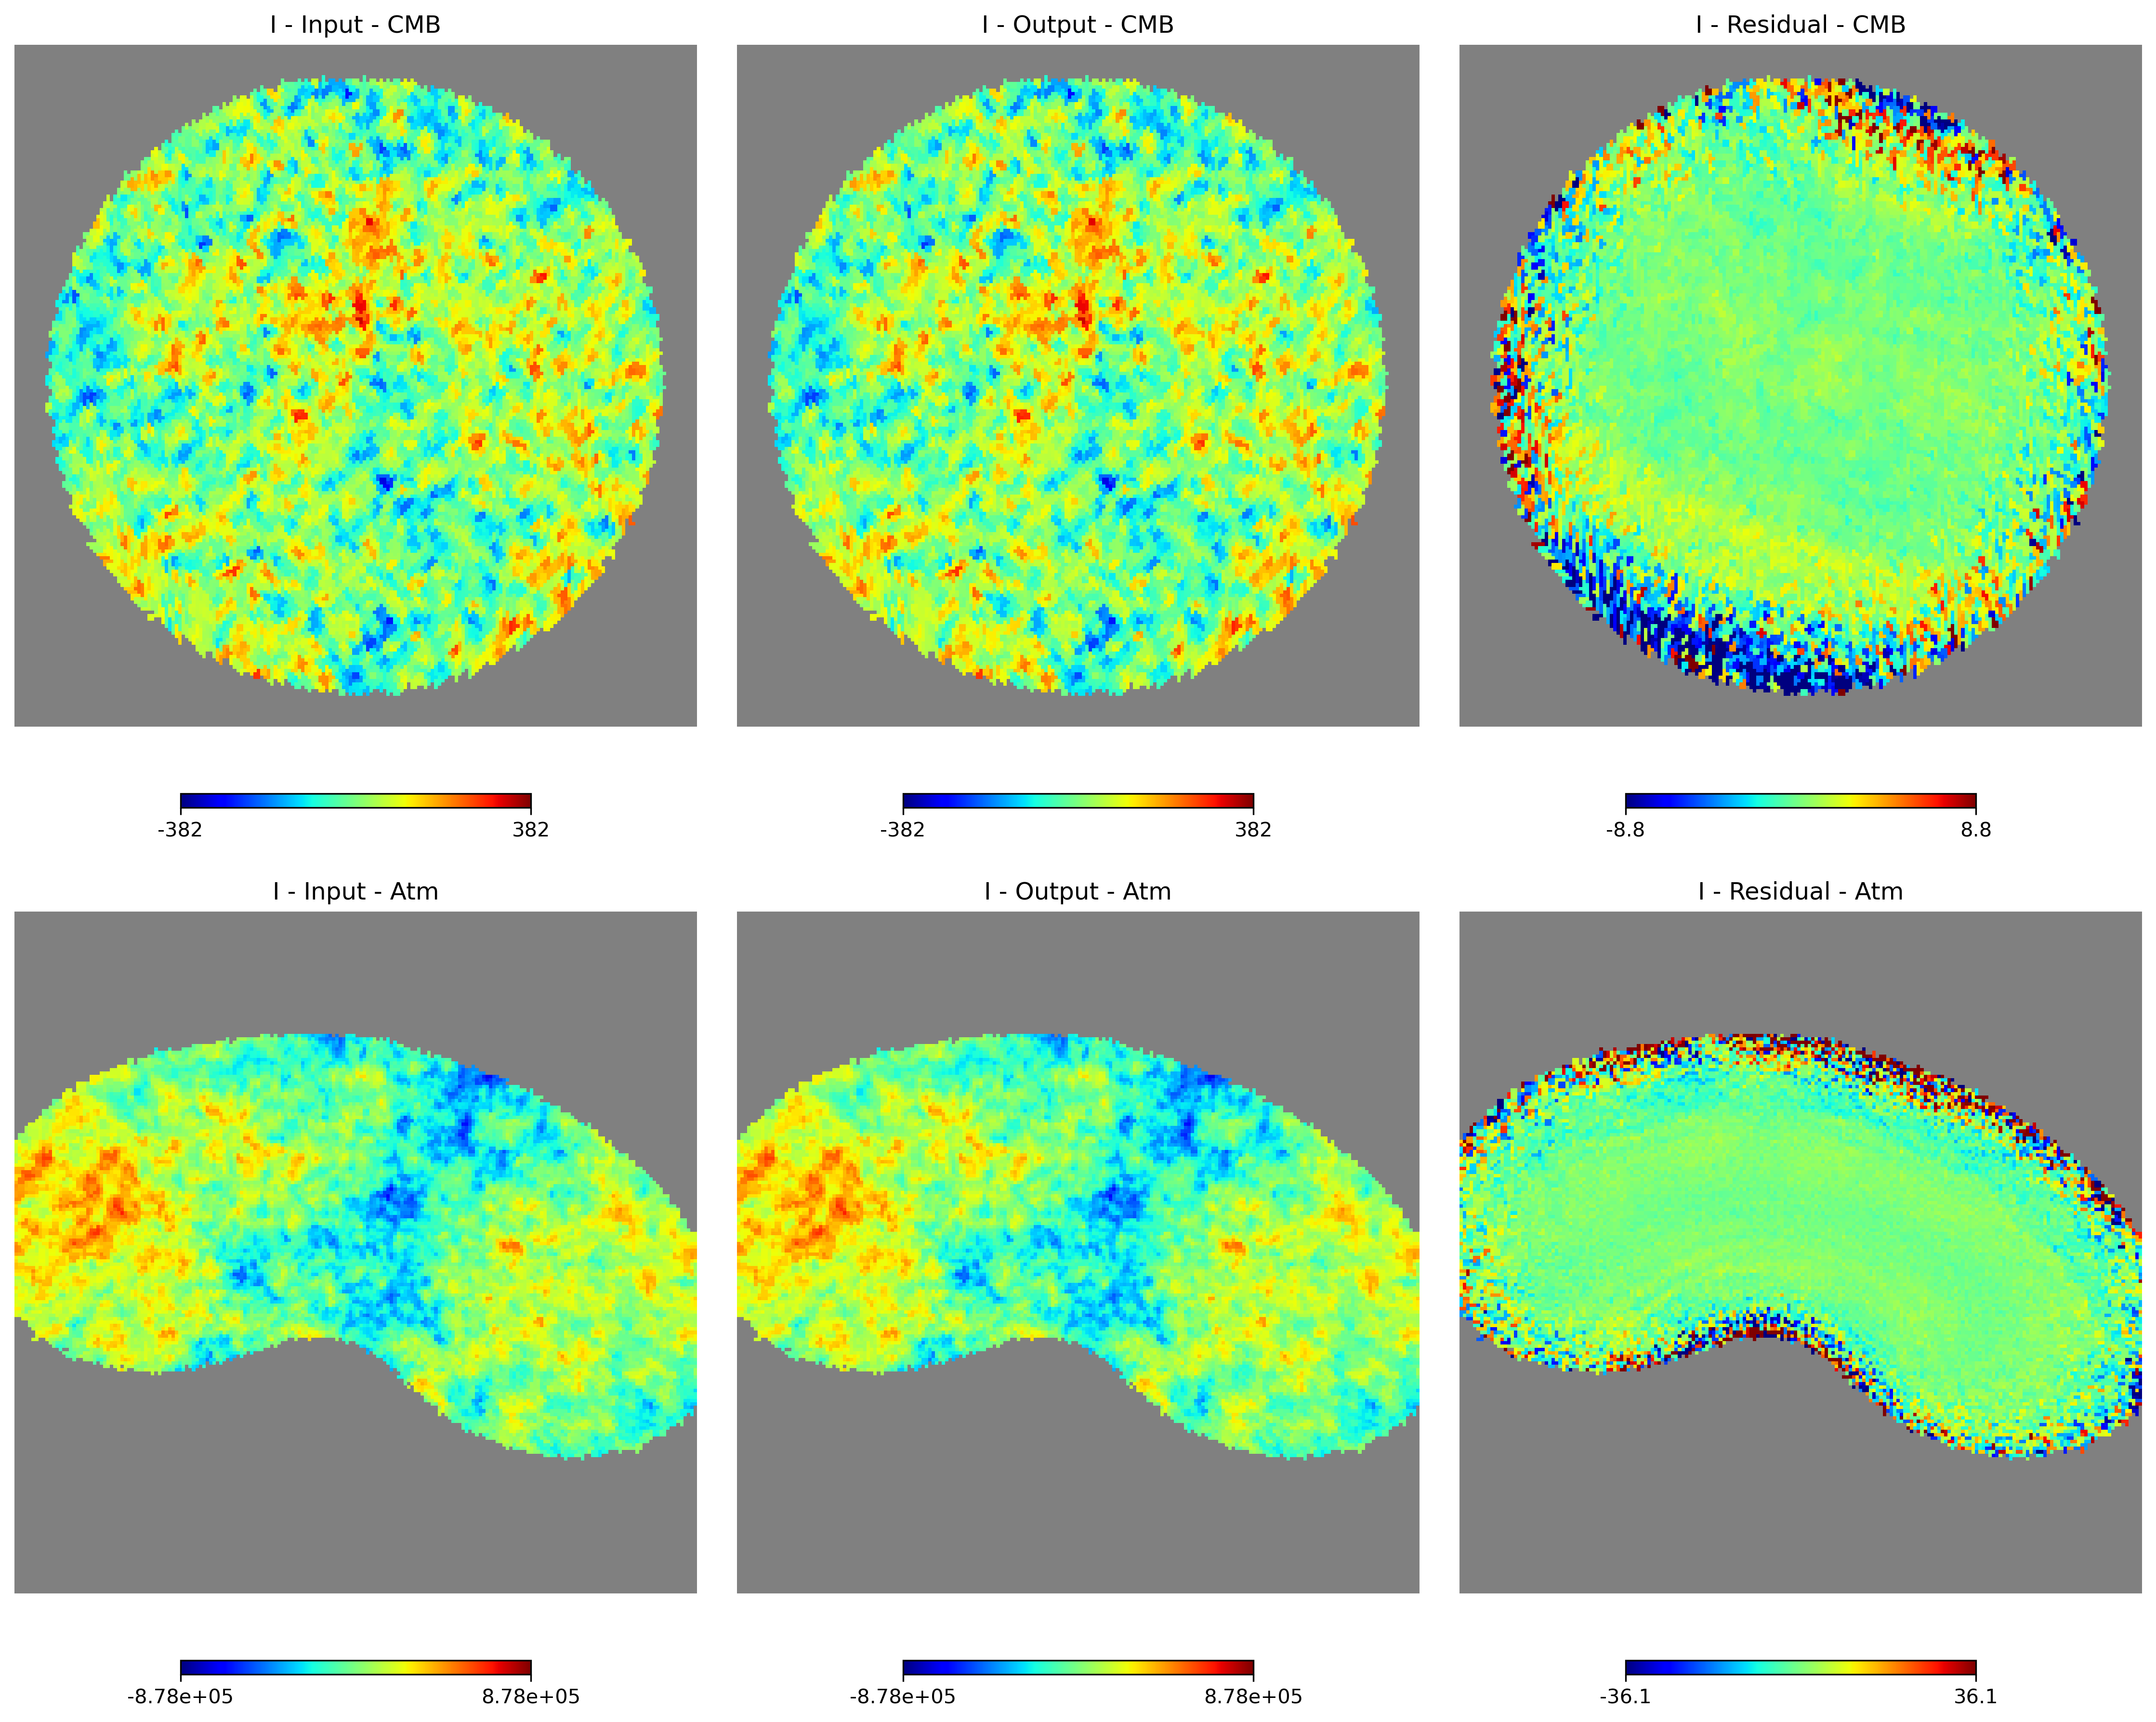

In [13]:
plt.figure(figsize=(15, 12), dpi=300)
k = 1

istk = 0
stk = ["I", "Q", "U"]

reso = [15, 30]

for imap in range(input.shape[0]):
    if imap == 0:
        map = "CMB"
        center = center_gal
        input[imap, ~seenpix_gal, :] = hp.UNSEEN
        output[imap, ~seenpix_gal, :] = hp.UNSEEN
        residual[imap, ~seenpix_gal, :] = hp.UNSEEN
    else:
        map = "Atm"
        center = center_local
        input[imap, ~seenpix_local, :] = hp.UNSEEN
        output[imap, ~seenpix_local, :] = hp.UNSEEN
        residual[imap, ~seenpix_local, :] = hp.UNSEEN

    sigma = np.std(residual[imap, seenpix[imap], istk])
    nsigma = 3

    hp.gnomview(
        input[imap, :, istk],
        reso=reso[imap],
        rot=center,
        min=min_input[imap, istk],
        max=max_input[imap, istk],
        cmap="jet",
        sub=(input.shape[0], 3, k),
        title=f"{stk[istk]} - Input - {map}",
        notext=True,
    )
    hp.gnomview(
        output[imap, :, istk],
        reso=reso[imap],
        rot=center,
        min=min_input[imap, istk],
        max=max_input[imap, istk],
        cmap="jet",
        sub=(input.shape[0], 3, k + 1),
        title=f"{stk[istk]} - Output - {map}",
        notext=True,
    )
    hp.gnomview(
        residual[imap, :, istk],
        reso=reso[imap],
        rot=center,
        min=-nsigma * sigma,
        max=nsigma * sigma,
        cmap="jet",
        sub=(input.shape[0], 3, k + 2),
        title=f"{stk[istk]} - Residual - {map}",
        notext=True,
    )
    k += 3

plt.tight_layout()

/tmp/ipykernel_32125/3150944517.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


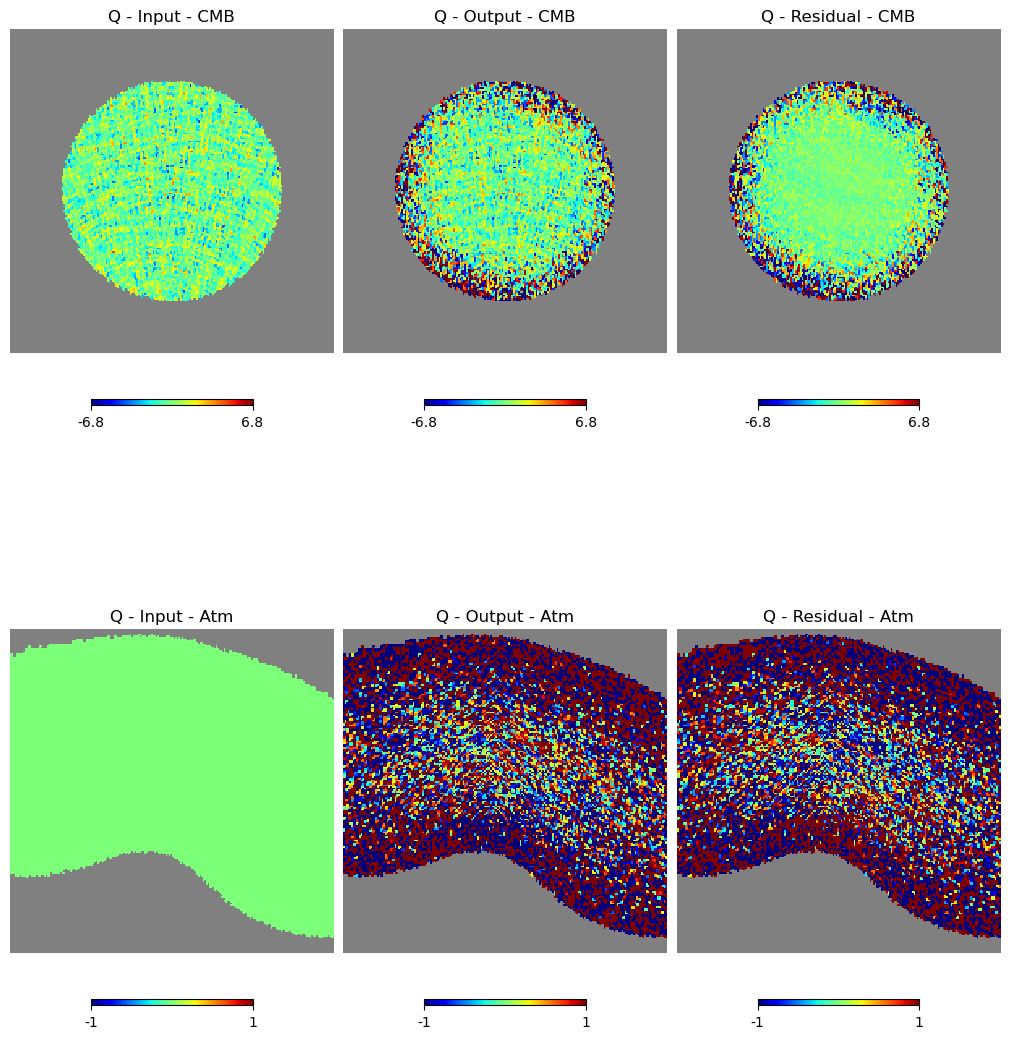

In [ ]:
plt.figure(figsize=(10, 12))
k = 1

istk = 1
stk = ["I", "Q", "U"]

reso = 20

for imap in range(input.shape[0]):
    if imap == 0:
        map = "CMB"
        center = center_gal
    else:
        map = "Atm"
        center = center_local

    hp.gnomview(
        input[imap, :, istk],
        reso=reso,
        rot=center,
        min=min_input[imap, istk],
        max=max_input[imap, istk],
        cmap="jet",
        sub=(input.shape[0], 3, k),
        title=f"{stk[istk]} - Input - {map}",
        notext=True,
    )
    hp.gnomview(
        output[imap, :, istk],
        reso=reso,
        rot=center,
        min=min_input[imap, istk],
        max=max_input[imap, istk],
        cmap="jet",
        sub=(input.shape[0], 3, k + 1),
        title=f"{stk[istk]} - Output - {map}",
        notext=True,
    )
    hp.gnomview(
        residual[imap, :, istk],
        reso=reso,
        rot=center,
        min=min_input[imap, istk],
        max=max_input[imap, istk],
        cmap="jet",
        sub=(input.shape[0], 3, k + 2),
        title=f"{stk[istk]} - Residual - {map}",
        notext=True,
    )
    k += 3

plt.tight_layout()

/tmp/ipykernel_152225/1573324539.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


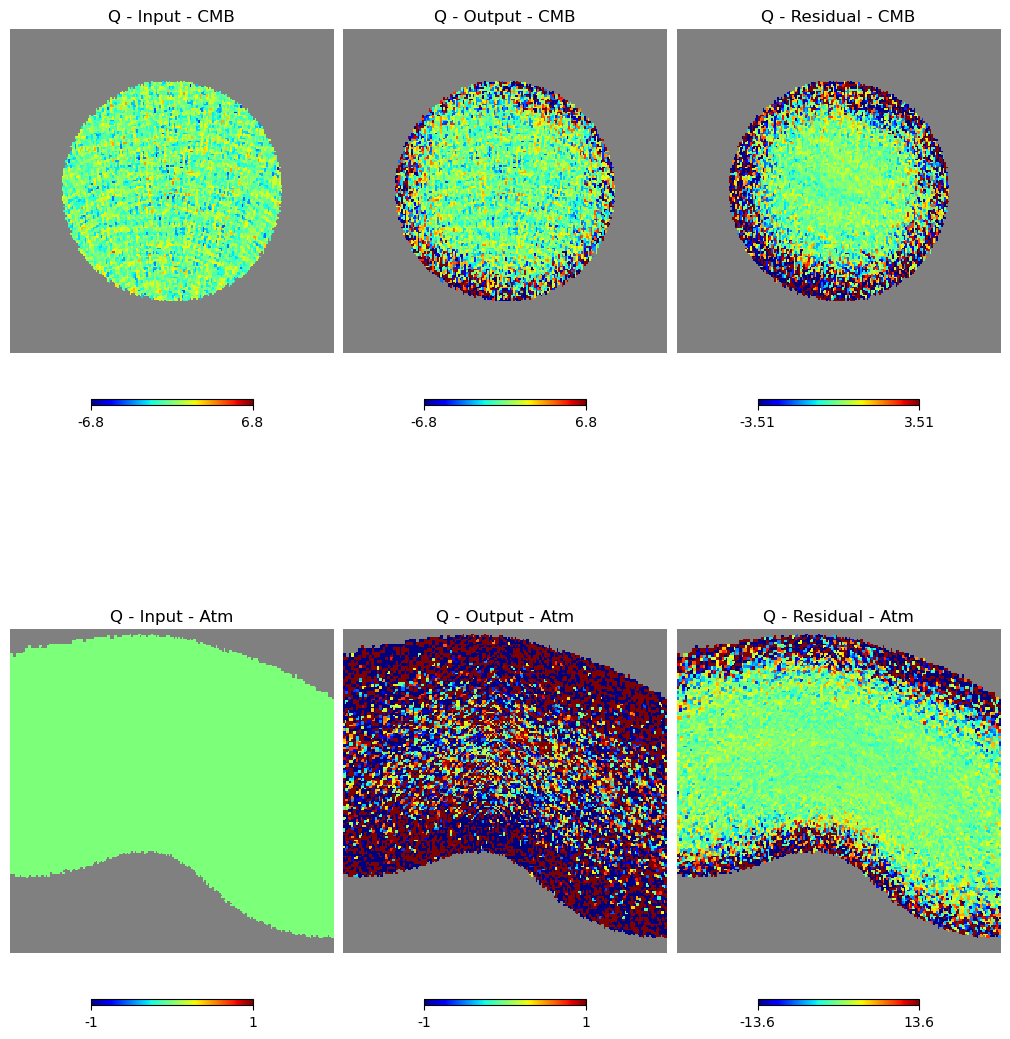

In [12]:
plt.figure(figsize=(10, 12))
k = 1

istk = 1
stk = ["I", "Q", "U"]

reso = 20

for imap in range(input.shape[0]):
    if imap == 0:
        map = "CMB"
        center = center_gal
        input[imap, ~seenpix_gal, :] = hp.UNSEEN
        output[imap, ~seenpix_gal, :] = hp.UNSEEN
        residual[imap, ~seenpix_gal, :] = hp.UNSEEN
    else:
        map = "Atm"
        center = center_local
        input[imap, ~seenpix_local, :] = hp.UNSEEN
        output[imap, ~seenpix_local, :] = hp.UNSEEN
        residual[imap, ~seenpix_local, :] = hp.UNSEEN

    sigma = np.std(residual[imap, seenpix[imap], istk])
    nsigma = 1

    hp.gnomview(
        input[imap, :, istk],
        reso=reso,
        rot=center,
        min=min_input[imap, istk],
        max=max_input[imap, istk],
        cmap="jet",
        sub=(input.shape[0], 3, k),
        title=f"{stk[istk]} - Input - {map}",
        notext=True,
    )
    hp.gnomview(
        output[imap, :, istk],
        reso=reso,
        rot=center,
        min=min_input[imap, istk],
        max=max_input[imap, istk],
        cmap="jet",
        sub=(input.shape[0], 3, k + 1),
        title=f"{stk[istk]} - Output - {map}",
        notext=True,
    )
    hp.gnomview(
        residual[imap, :, istk],
        reso=reso,
        rot=center,
        min=-nsigma * sigma,
        max=nsigma * sigma,
        cmap="jet",
        sub=(input.shape[0], 3, k + 2),
        title=f"{stk[istk]} - Residual - {map}",
        notext=True,
    )
    k += 3

plt.tight_layout()

/tmp/ipykernel_32125/2150670917.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


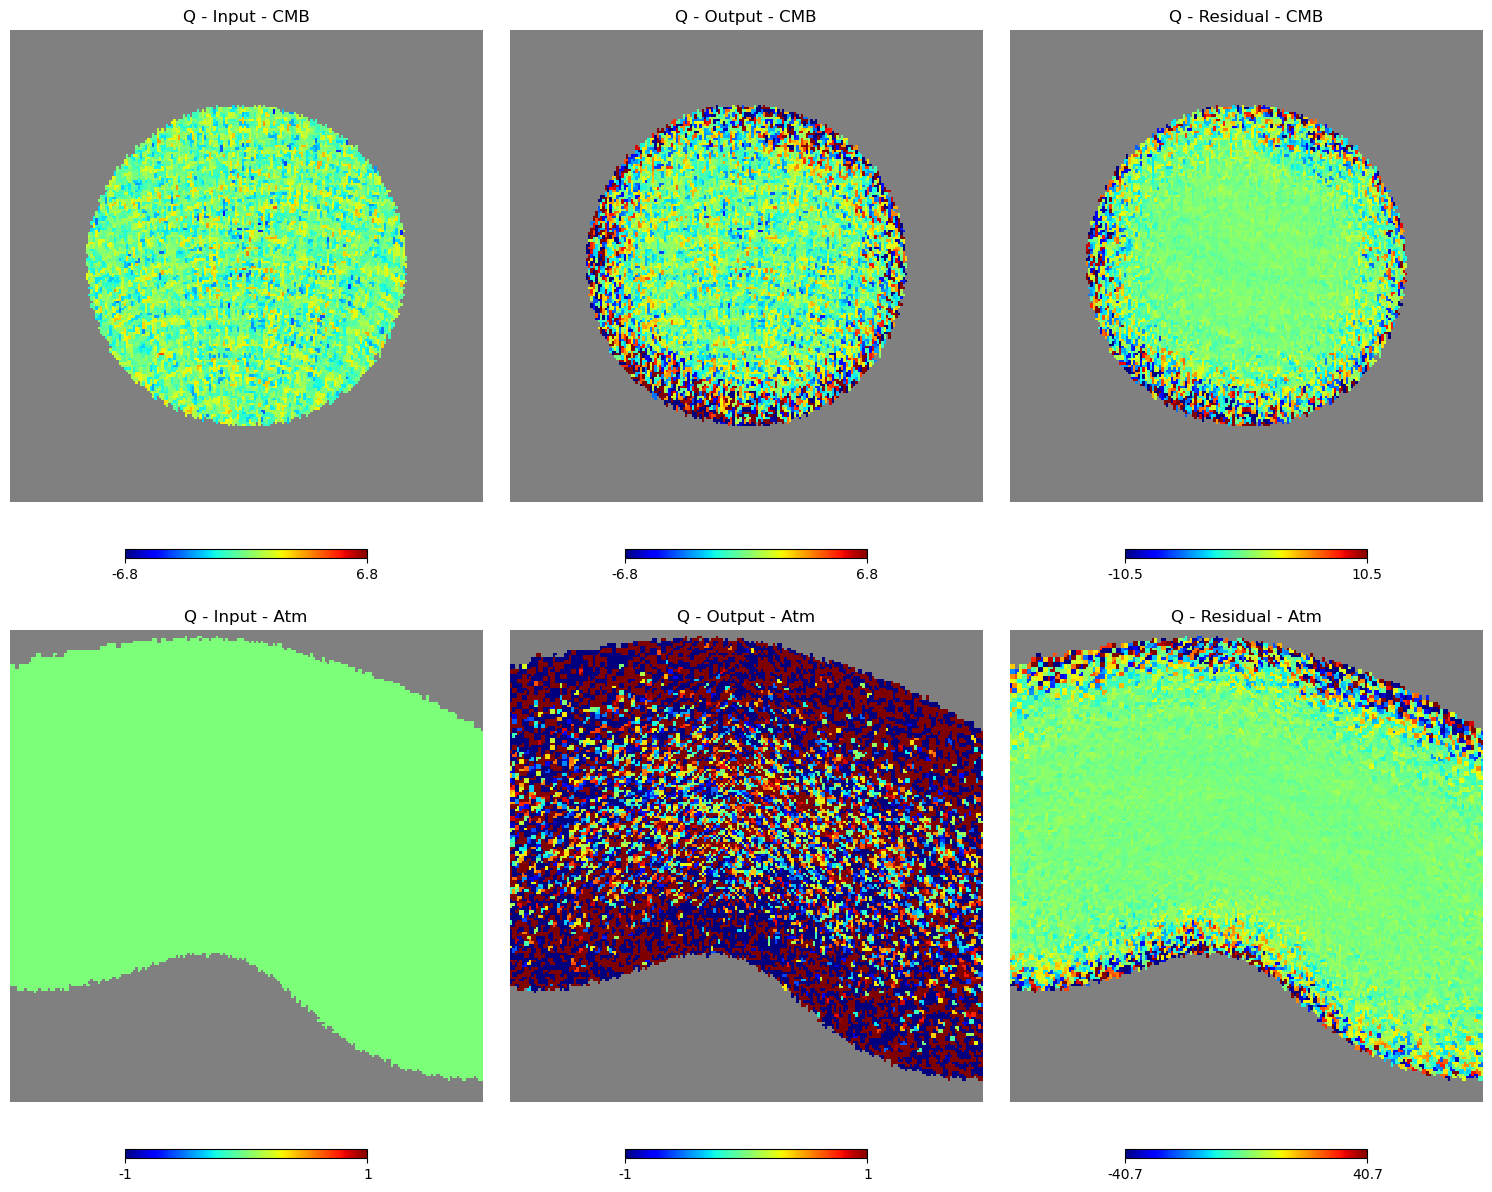

In [ ]:
plt.figure(figsize=(15, 12))
k = 1

istk = 1
stk = ["I", "Q", "U"]

reso = 20

for imap in range(input.shape[0]):
    if imap == 0:
        map = "CMB"
        center = center_gal
        input[imap, ~seenpix_gal, :] = hp.UNSEEN
        output[imap, ~seenpix_gal, :] = hp.UNSEEN
        residual[imap, ~seenpix_gal, :] = hp.UNSEEN
    else:
        map = "Atm"
        center = center_local
        input[imap, ~seenpix_local, :] = hp.UNSEEN
        output[imap, ~seenpix_local, :] = hp.UNSEEN
        residual[imap, ~seenpix_local, :] = hp.UNSEEN

    sigma = np.std(residual[imap, seenpix[imap], istk])
    nsigma = 3

    hp.gnomview(
        input[imap, :, istk],
        reso=reso,
        rot=center,
        min=min_input[imap, istk],
        max=max_input[imap, istk],
        cmap="jet",
        sub=(input.shape[0], 3, k),
        title=f"{stk[istk]} - Input - {map}",
        notext=True,
    )
    hp.gnomview(
        output[imap, :, istk],
        reso=reso,
        rot=center,
        min=min_input[imap, istk],
        max=max_input[imap, istk],
        cmap="jet",
        sub=(input.shape[0], 3, k + 1),
        title=f"{stk[istk]} - Output - {map}",
        notext=True,
    )
    hp.gnomview(
        residual[imap, :, istk],
        reso=reso,
        rot=center,
        min=-nsigma * sigma,
        max=nsigma * sigma,
        cmap="jet",
        sub=(input.shape[0], 3, k + 2),
        title=f"{stk[istk]} - Residual - {map}",
        notext=True,
    )
    k += 3

plt.tight_layout()